# Importing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv')

In [ ]:
# Drop columns containing any NaN values in the training dataset
X_train = X_train.dropna(axis=1)

# Make sure the testing dataset has the same columns as the training dataset
X_test = X_test[X_test.columns]

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical columns with mean (computed from the training dataset)
for col in numerical_columns:
    mean_value = X_train[col].mean()
    X_train[col].fillna(mean_value, inplace=True)
    X_test[col].fillna(mean_value, inplace=True)

# Fill missing values in categorical columns with mode (computed from the training dataset)
for col in categorical_columns:
    mode_value = X_train[col].mode().iloc[0]
    X_train[col].fillna(mode_value, inplace=True)
    X_test[col].fillna(mode_value, inplace=True)

# Models

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 50, 
                            criterion = "squared_error", 
                            bootstrap = True)
lr_model = LinearRegression()

In [ ]:
# Training
rf_model.fit(X_train,y_train)

<ipython-input-57-56c58f4afaf0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50)

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
rf_model_predictions = rf_model.predict(X_train)

In [ ]:
lr_model_predictions = lr_model.predict(X_train)

In [ ]:
print('The Random Forest score is: ', RFR.score(X_train,y_train))
print('The Linear Regression score is: ', LRM.score(X_train,y_train))

The Random Forest score is:  0.927597378711079
The Linear Regression score is:  1.0


Random Forest MSE: 1.2454718036022667e-05
Linear Regression MSE: 5.053559704196075e-05
Random Forest MAE: 2.7878119644642663e-05
Linear Regression MAE: 6.368761577440368e-05


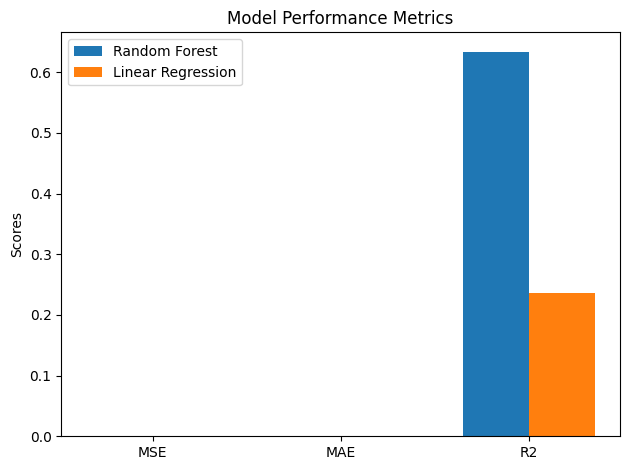

In [ ]:
# Calculate evaluation metrics
# Cross-validation

cv = 5 
y_train_flat = y_train.values.ravel()

X = X_train
y = y_train.values.ravel()

# Cross-validation
cv = 5  # number of folds

rf_mse = -cross_val_score(rf_model, X, y, cv=cv, scoring=make_scorer(mean_squared_error, greater_is_better=False)).mean()
lr_mse = -cross_val_score(lr_model, X, y, cv=cv, scoring=make_scorer(mean_squared_error, greater_is_better=False)).mean()

rf_mae = -cross_val_score(rf_model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error, greater_is_better=False)).mean()
lr_mae = -cross_val_score(lr_model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error, greater_is_better=False)).mean()

rf_r2 = cross_val_score(rf_model, X, y, cv=cv, scoring=make_scorer(r2_score)).mean()
lr_r2 = cross_val_score(lr_model, X, y, cv=cv, scoring=make_scorer(r2_score)).mean()

print("Random Forest MSE:", rf_mse)
print("Linear Regression MSE:", lr_mse)
print("Random Forest MAE:", rf_mae)
print("Linear Regression MAE:", lr_mae)

# Plot evaluation metrics
metrics = ['MSE', 'MAE', 'R2']
rf_values = [rf_mse, rf_mae, rf_r2]
lr_values = [lr_mse, lr_mae, lr_r2]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest')
rects2 = ax.bar(x + width/2, lr_values, width, label='Linear Regression')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

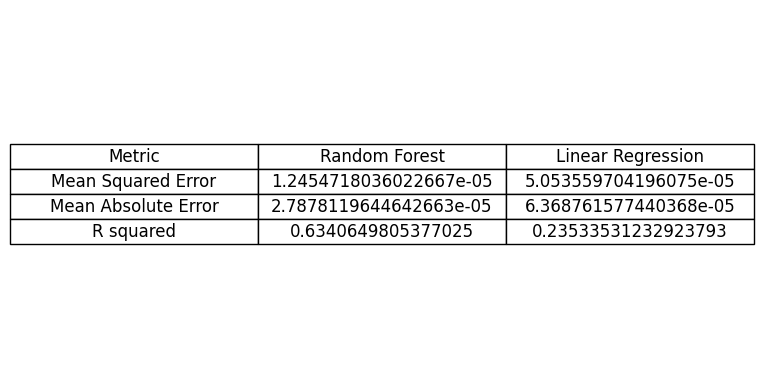

In [ ]:
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R squared']
rf_values = [rf_mse, rf_mae, rf_r2]
lr_values = [lr_mse, lr_mae, lr_r2]

# Create table using matplotlib
fig, ax = plt.subplots()
ax.axis('off')

table_data = [['Metric', 'Random Forest', 'Linear Regression']] + [[metrics[i], rf_values[i], lr_values[i]] for i in range(len(metrics))]
table = ax.table(cellText=table_data, cellLoc='center', loc='center')

# Modify table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()